scikit-learnは、APIが非常に整備されている。「モデル設定」のセクションだけ変更すれば、他は同じコードで動く。

なので、以下の流れは、何百回も行うことになる。

# 準備

In [1]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.datasets import make_classification, make_blobs
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)


import numpy as np
import pandas as pd
import seaborn as sns
import time

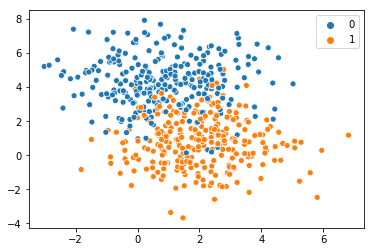

In [2]:
# X_orig, y_orig = make_classification(n_samples = 500, class_sep=0.0001)
X_orig, y_orig = make_blobs(n_samples=550, centers=2, n_features=2,
                  random_state=0, cluster_std=1.5)
sns.scatterplot(X_orig[:,0], X_orig[:,1], hue=y_orig)

In [3]:
X_train, y_train = X_orig[:500,:], y_orig[:500]
X_test, y_test = X_orig[500:,:], y_orig[500:]

# モデル設定

## パラメータ

In [4]:
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = dict(
    C=0.0001,
    kernel="rbf",
    gamma="scale",
    class_weight="balanced"
)

## アルゴリズム

In [5]:
def get_classifier(algorithm):
    if algorithm == "SVC":
        return SVC(**svc_params,
                   probability=True,
                   random_state=1)
    elif algorithm == "GradientBoosting":
        return GradientBoostingClassifier(**gb_params,
                                          random_state=1)
    elif algorithm == "AdaBoost":
        return AdaBoostClassifier(**ada_params,
                                  random_state=1)
    elif algorithm == "ExtraTreesClassifier":
        return ExtraTreesClassifier(**et_params,
                                    random_state=1)
    elif algorithm == "RandomForest":
        return RandomForestClassifier(**rf_params,
                                      random_state=1)
    else:
        raise Exception(f"unknown algorithm name: {algorithm}")

In [6]:
clf = get_classifier("AdaBoost")

# 学習と評価

In [7]:
start_time = time.perf_counter()
fit = clf.fit(X_train, y_train)
print(f"elapsed {time.perf_counter() - start_time}")

elapsed 0.8123650699999416


In [8]:
def print_metrics(fit, X, y):
    pred = fit.predict(X)
    prob = fit.predict_proba(X)
    print(f"""
    accuracy={accuracy_score(y, pred)}
    precision={precision_score(y, pred)}
    recall={recall_score(y, pred)}
    auc={roc_auc_score(y, prob[:,1])}
    """)

In [9]:
print("====train====")
print_metrics(fit, X_train, y_train)
print("====test====")
print_metrics(fit, X_test, y_test)

====train====

    accuracy=0.984
    precision=0.9919354838709677
    recall=0.9761904761904762
    auc=0.9989759344598054
    
====test====

    accuracy=0.88
    precision=0.8695652173913043
    recall=0.8695652173913043
    auc=0.928341384863124
    


ハイパーパラメータを適当に決めているので、過学習している。つまり、テストデータでの精度が一貫して訓練時の精度よりも下がっている